<a href="https://colab.research.google.com/github/Nyimassharima/income-status-of-manufacturing-companies-during-COVID-19/blob/main/income_status_of_manufacturing_companies_during_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSC UB

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
matplotlib.style.use('ggplot') 

import warnings
warnings.filterwarnings('ignore')


import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFZzA6edUjGCff-uxLZn8GxttGOY24sPpzQnXca1eF6mKh7lO-Kgak
Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/My Drive/NSC UB 2020/Data NSC.xlsx")

In [ ]:
df.head()

,No,Nama Perusahaan,KODE,BIDANG,ROA,ROE,DAR,DER,CR,QR,Status Pendapatan
0,1,PT Argha Karya Prima Ind. Tbk,AKPI,plastik dan kemasan,-0.017,-0.036,0.538,1.166,1.982,1.223,Rugi
1,2,PT Alkindo Naratama Tbk,ALDO,pulp dan kertas,0.011,0.020,0.420,0.724,6.582,3.742,Laba
2,3,PT Alumindo Light MetalIndustry Tbk,ALMI,logam,0.029,-1.256,1.023,-44.200,6.772,2.509,Laba
3,4,PT Asiaplast Industries Tbk,APLI,plastik dan kemasan,0.005,0.010,0.503,1.011,1.196,0.692,Laba
4,5,PT Arwana Citramulia Tbk,ARNA,keramik dan kaca,0.038,0.062,0.385,0.627,9.996,8.968,Laba


In [ ]:
def pendapatan_convert(x):
    if x['Status Pendapatan']=='Laba':
        Pendapatan=1
    else:
        Pendapatan=0
    return Pendapatan

df['Pendapatan']=df.apply(lambda x:pendapatan_convert(x),axis=1)
df.head()

,No,Nama Perusahaan,KODE,BIDANG,ROA,ROE,DAR,DER,CR,QR,Status Pendapatan,Pendapatan
0,1,PT Argha Karya Prima Ind. Tbk,AKPI,plastik dan kemasan,-0.017,-0.036,0.538,1.166,1.982,1.223,Rugi,0
1,2,PT Alkindo Naratama Tbk,ALDO,pulp dan kertas,0.011,0.020,0.420,0.724,6.582,3.742,Laba,1
2,3,PT Alumindo Light MetalIndustry Tbk,ALMI,logam,0.029,-1.256,1.023,-44.200,6.772,2.509,Laba,1
3,4,PT Asiaplast Industries Tbk,APLI,plastik dan kemasan,0.005,0.010,0.503,1.011,1.196,0.692,Laba,1
4,5,PT Arwana Citramulia Tbk,ARNA,keramik dan kaca,0.038,0.062,0.385,0.627,9.996,8.968,Laba,1


In [ ]:
df.pivot_table(index='BIDANG', columns='Status Pendapatan', values='ROA',aggfunc=len,fill_value=0).reset_index()

Status Pendapatan,BIDANG,Laba,Rugi
0,agribisnis,2,0
1,alas kaki,0,1
2,elektronika,1,0
3,farmasi,3,1
4,kabel,2,1
5,kayu dan pengolahannya,0,2
6,keramik dan kaca,1,3
7,kimia,3,1
8,kosmetik,2,1
9,logam,2,0


In [ ]:
df.drop(['No', 'Nama Perusahaan', 'KODE','Status Pendapatan'],
        axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.head()

,BIDANG,ROA,ROE,DAR,DER,CR,QR,Pendapatan
0,plastik dan kemasan,-0.017,-0.036,0.538,1.166,1.982,1.223,0
1,pulp dan kertas,0.011,0.020,0.420,0.724,6.582,3.742,1
2,logam,0.029,-1.256,1.023,-44.200,6.772,2.509,1
3,plastik dan kemasan,0.005,0.010,0.503,1.011,1.196,0.692,1
4,keramik dan kaca,0.038,0.062,0.385,0.627,9.996,8.968,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BIDANG      50 non-null     object 
 1   ROA         50 non-null     float64
 2   ROE         50 non-null     float64
 3   DAR         50 non-null     float64
 4   DER         50 non-null     float64
 5   CR          50 non-null     float64
 6   QR          50 non-null     float64
 7   Pendapatan  50 non-null     int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
df.dtypes

BIDANG         object
ROA           float64
ROE           float64
DAR           float64
DER           float64
CR            float64
QR            float64
Pendapatan      int64
dtype: object

In [ ]:
df.shape

(50, 8)

In [ ]:
df["BIDANG"].value_counts()

farmasi                   4
semen                     4
makanan dan minuman       4
kimia                     4
pulp dan kertas           4
keramik dan kaca          4
kosmetik                  3
tekstil dan garmen        3
kabel                     3
plastik dan kemasan       3
pakan ternak              2
logam                     2
kayu dan pengolahannya    2
agribisnis                2
otomotif dan komponen     2
peralatan rumah tangga    2
elektronika               1
alas kaki                 1
Name: BIDANG, dtype: int64

In [ ]:
df["Pendapatan"].value_counts()

1    34
0    16
Name: Pendapatan, dtype: int64

In [ ]:
df.head()

,BIDANG,ROA,ROE,DAR,DER,CR,QR,Pendapatan
0,plastik dan kemasan,-0.017,-0.036,0.538,1.166,1.982,1.223,0
1,pulp dan kertas,0.011,0.020,0.420,0.724,6.582,3.742,1
2,logam,0.029,-1.256,1.023,-44.200,6.772,2.509,1
3,plastik dan kemasan,0.005,0.010,0.503,1.011,1.196,0.692,1
4,keramik dan kaca,0.038,0.062,0.385,0.627,9.996,8.968,1


In [ ]:
df.describe()

,ROA,ROE,DAR,DER,CR,QR,Pendapatan
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,0.002974,0.056600,0.576160,-0.941040,6.61256,4.345320,0.680000
std,0.040140,0.460595,0.675479,9.764069,9.88953,6.665765,0.471212
min,-0.192000,-1.256000,0.058000,-50.154000,0.28400,0.125000,0.000000
25%,-0.005750,-0.007000,0.307000,0.274000,1.47125,0.755250,0.000000
50%,0.006000,0.011000,0.500000,0.785000,2.49200,1.656000,1.000000
75%,0.026500,0.035500,0.641500,1.444750,7.18225,4.620750,1.000000
max,0.086000,2.620000,4.931000,10.098000,51.38500,33.980000,1.000000


## **Outlier Handing (Capping)**

Text(0.5, 1.0, 'Boxplot of QR')

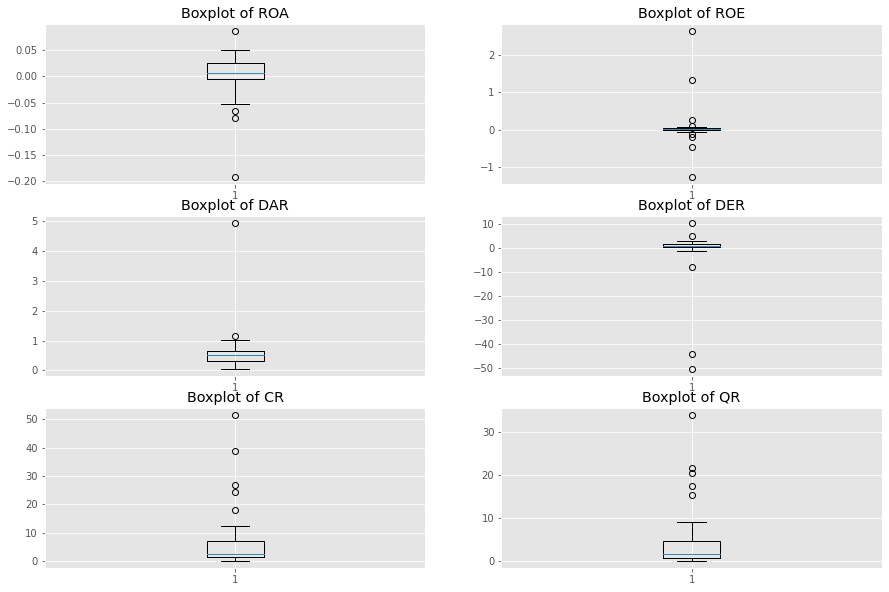

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (15,10),
#                        sharex=True,
#                        gridspec_kw= {"height_ratios": (0.2, 1)}
                      )

ax[0,0].boxplot(x = 'ROA',data=df)
ax[0,0].set_title('Boxplot of ROA')

ax[0,1].boxplot(x = 'ROE',data=df)
ax[0,1].set_title('Boxplot of ROE')

ax[1,0].boxplot(x = 'DAR',data=df)
ax[1,0].set_title('Boxplot of DAR')

ax[1,1].boxplot(x = 'DER',data=df)
ax[1,1].set_title('Boxplot of DER')

ax[2,0].boxplot(x = 'CR',data=df)
ax[2,0].set_title('Boxplot of CR')

ax[2,1].boxplot(x = 'QR',data=df)
ax[2,1].set_title('Boxplot of QR')

#plt.savefig('fig/9a.png', tight_box=True)

In [ ]:
#Fungsi pendeteksi Outlier
def outlier_detection(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    outlier = (x>upper_limit )|(x<lower_limit)
    return outlier

for i in ['ROA','ROE','DAR','DER','CR','QR']:
    print('Jumlah outlier pada variabel '+ str(i) + ' adalah '+ str(outlier_detection(df[i]).sum()))

Jumlah outlier pada variabel ROA adalah 4
Jumlah outlier pada variabel ROE adalah 8
Jumlah outlier pada variabel DAR adalah 2
Jumlah outlier pada variabel DER adalah 5
Jumlah outlier pada variabel CR adalah 5
Jumlah outlier pada variabel QR adalah 5


In [ ]:
def outlier_cap(x,data):
    q1 = data[x].quantile(0.25)
    q3 = data[x].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    data = data[(data[x] < upper_limit) & (data[x] > lower_limit)]
#     data.loc[(data[x]<lower_limit),x]=lower_limit
#     data.loc[(data[x]>upper_limit),x]=upper_limit
    return data

for i in ['ROA',
          'ROE',
          'DAR',
          'DER',
          'CR',
          'QR'
         ]:
    df_cap = outlier_cap(i,df)

In [ ]:
df_cap.head()

,BIDANG,ROA,ROE,DAR,DER,CR,QR,Pendapatan
0,plastik dan kemasan,-0.017,-0.036,0.538,1.166,1.982,1.223,0
1,pulp dan kertas,0.011,0.020,0.420,0.724,6.582,3.742,1
2,logam,0.029,-1.256,1.023,-44.200,6.772,2.509,1
3,plastik dan kemasan,0.005,0.010,0.503,1.011,1.196,0.692,1
4,keramik dan kaca,0.038,0.062,0.385,0.627,9.996,8.968,1


In [ ]:
df_cap.shape

(45, 8)

In [ ]:
df_cap.describe()

,ROA,ROE,DAR,DER,CR,QR,Pendapatan
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.000660,0.059711,0.618689,-1.073333,3.797222,2.403111,0.644444
std,0.041412,0.485923,0.699355,10.295159,3.469752,2.472648,0.484090
min,-0.192000,-1.256000,0.058000,-50.154000,0.284000,0.125000,0.000000
25%,-0.007000,-0.009000,0.332000,0.398000,1.201000,0.692000,0.000000
50%,0.005000,0.010000,0.510000,0.958000,2.175000,1.438000,1.000000
75%,0.021000,0.036000,0.655000,1.564000,6.270000,3.114000,1.000000
max,0.086000,2.620000,4.931000,10.098000,12.339000,9.122000,1.000000


In [ ]:
X = df_cap.drop('Pendapatan', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head()

,BIDANG,ROA,ROE,DAR,DER,CR,QR
0,plastik dan kemasan,-0.017,-0.036,0.538,1.166,1.982,1.223
1,pulp dan kertas,0.011,0.020,0.420,0.724,6.582,3.742
2,logam,0.029,-1.256,1.023,-44.200,6.772,2.509
3,plastik dan kemasan,0.005,0.010,0.503,1.011,1.196,0.692
4,keramik dan kaca,0.038,0.062,0.385,0.627,9.996,8.968


In [ ]:
y = df_cap['Pendapatan'].copy()
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Pendapatan, dtype: int64

In [ ]:
X_encoded = pd.get_dummies(X, columns=['BIDANG'])
X_encoded.head()

,ROA,ROE,DAR,DER,CR,QR,BIDANG_agribisnis,BIDANG_alas kaki,BIDANG_elektronika,BIDANG_farmasi,BIDANG_kabel,BIDANG_kayu dan pengolahannya,BIDANG_keramik dan kaca,BIDANG_kimia,BIDANG_kosmetik,BIDANG_logam,BIDANG_makanan dan minuman,BIDANG_otomotif dan komponen,BIDANG_pakan ternak,BIDANG_peralatan rumah tangga,BIDANG_plastik dan kemasan,BIDANG_pulp dan kertas,BIDANG_semen,BIDANG_tekstil dan garmen
0,-0.017,-0.036,0.538,1.166,1.982,1.223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.011,0.020,0.420,0.724,6.582,3.742,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.029,-1.256,1.023,-44.200,6.772,2.509,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.005,0.010,0.503,1.011,1.196,0.692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.038,0.062,0.385,0.627,9.996,8.968,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_encoded.shape

(45, 24)

In [ ]:
sum(y)/len(y)

0.6444444444444445

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)

In [ ]:
print('Size of X_train:',X_train.shape)
print('Size of X_test:',X_test.shape)
print('Size of y_train:',y_train.shape)
print('Size of y_test :',y_test.shape)

Size of X_train: (33, 24)
Size of X_test: (12, 24)
Size of y_train: (33,)
Size of y_test : (12,)


In [ ]:
sum(y_train)/len(y_train)

0.6363636363636364

In [ ]:
sum(y_test)/len(y_test)

0.6666666666666666

In [ ]:
len(y_test)

12

## **Feature Importance**

In [ ]:
from datetime import datetime as dt
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
start = dt.now()
rfc.fit(X_train,y_train)
print(dt.now()-start)

0:00:00.133645


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

1.0

In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [ ]:
base_imp = imp_df(X_train.columns, rfc.feature_importances_)
base_imp

,feature,feature_importance
0,ROA,0.358246
1,ROE,0.284832
2,QR,0.075763
3,CR,0.068708
4,DER,0.064039
5,DAR,0.062919
6,BIDANG_plastik dan kemasan,0.013791
7,BIDANG_keramik dan kaca,0.009839
8,BIDANG_peralatan rumah tangga,0.009424
9,BIDANG_tekstil dan garmen,0.009214


## **Feature Selection**

In [ ]:
best_feature = list(base_imp[base_imp['feature_importance']>0.05]['feature'])
best_feature

['ROA', 'ROE', 'QR', 'CR', 'DER', 'DAR']

In [ ]:
len(best_feature)

6

In [ ]:
X_train_selected = X_train[best_feature]
X_test_selected = X_test[best_feature]

In [ ]:
display(X_train_selected.head())
display(X_test_selected.head())

,ROA,ROE,QR,CR,DER,DAR
27,0.007,0.004,2.674,5.354,0.252,0.469
9,0.013,0.032,0.905,1.639,0.139,0.058
38,0.028,0.083,0.732,1.008,1.990,0.665
16,0.015,0.029,1.438,1.770,0.872,0.466
42,-0.006,-0.007,4.978,6.270,0.240,0.194


,ROA,ROE,QR,CR,DER,DAR
1,0.011,0.020,3.742,6.582,0.724,0.420
13,-0.192,1.314,0.432,1.906,-7.827,1.146
2,0.029,-1.256,2.509,6.772,-44.200,1.023
29,-0.066,-0.205,0.314,0.720,2.088,0.676
18,0.029,0.042,9.122,11.882,0.437,0.304


## **Modelling**

In [ ]:
X_train_scaled = scale(X_train_selected)
X_test_scaled = scale(X_test_selected)

In [ ]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

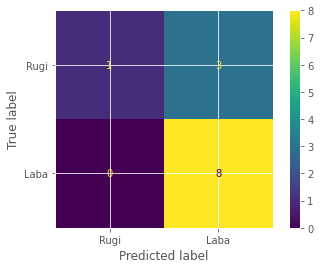

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test,
                      values_format='d',
                      display_labels=["Rugi", "Laba"])

In [ ]:
param_grid = [
  {'C': [0.5, 1, 10, 100], # NOTE: Values for C must be > 0
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma='scale'
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy', ## (accruacy is default scoring) Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='balanced_accuracy', ## Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='f1', ## Terrible!!! C=0.5, gamma=1
        ##scoring='f1_micro', ## Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='f1_macro', ## Same!! C=1, gamma='scale' (these are the same as default values)
        ##scoring='f1_weighted', ## Same!! C=1, gamma='scale' (these are the same as default values)
        ##scoring='roc_auc', ## Terrible!!! C=1, gamma=0.001
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
clf_svm = SVC(random_state=42, C=100, gamma=0.1)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

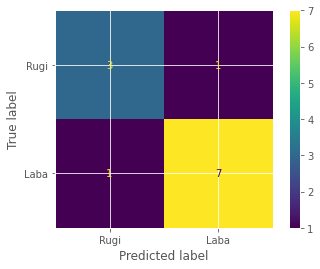

In [ ]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test,
                      values_format='d',
                      display_labels=["Rugi", "Laba"])

In [ ]:
y_pred=clf_svm.predict(X_test_scaled)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


## **Prediction**

In [ ]:
df_predict=pd.read_excel("/content/drive/My Drive/NSC UB 2020/data_predict.xlsx")
df_predict_scaled = scale(df_predict)

In [ ]:
display(df_predict)
display(df_predict_scaled)

,ROE,ROA,DER,CR,QR,DAR
0,0.061,0.025,1.401,11.462,6.825,0.583
1,-0.041,-0.015,1.633,11.571,4.216,0.620
2,0.070,0.620,0.133,33.513,27.519,0.118


array([[ 0.61582652, -0.63711087,  0.52381734, -0.71235615, -0.57827138,
         0.62456932],
       [-1.41044139, -0.77486457,  0.87572552, -0.70184439, -0.82854122,
         0.78654875],
       [ 0.79461487,  1.41197544, -1.39954286,  1.41420054,  1.40681259,
        -1.41111808]])

In [ ]:
clf_svm.predict(df_predict_scaled)

array([1, 0, 1])

## **Visualization**

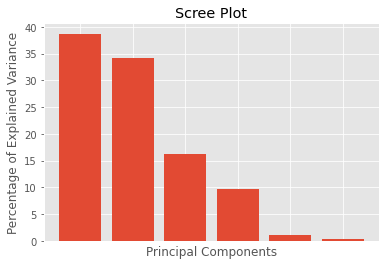

In [ ]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [ ]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Now we optimize the SVM fit to the x and y-axis coordinates
## of the data after PCA dimension reduction...
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}


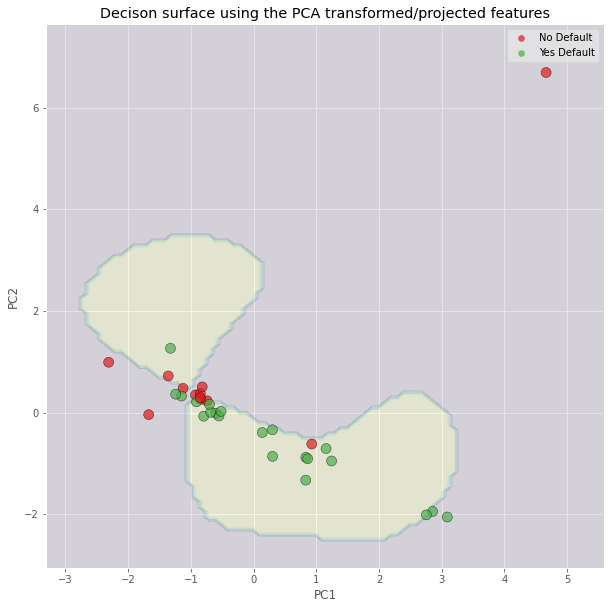

In [ ]:
clf_svm = SVC(random_state=42, C=1000, gamma='scale')
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now draw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm_default.png')
plt.show()